# Projeto Grupo BT-G3


## **Integrantes do grupo**
- Daniel Barzilai
- Larissa Carvalho
- Maria Luisa Maia
- Pedro Rezende
- Rafael Moritz
- Vitor Oliveira

<center><img src="https://www.inteli.edu.br/wp-content/uploads/2021/08/20172028/marca_1-2.png" width="50%" height="50%"/></center>

<h1 align='center'><b>IA para Marketing: Monitoramento de campanhas utilizando processamento de linguagem natural (PLN)<b></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Btg-logo-blue.svg" width="50%" height="50%"/></center>

<h2 align='center'>O Banco BTG Pactual enfrenta um desafio na área de Marketing em entender as necessidades e demandas dos clientes de maneira fácil e rápida nas redes sociais. A solução proposta para esse problema foi o desenvolvimento de uma Inteligência Artificial utilizando processamento de linguagem natural (PLN), capaz de monitorar as campanhas de marketing, voltadas para o Instagram. O objetivo principal dessa solução é rastrear os dados em tempo real, analisar e interpretar as mensagens e comentários enviados pelos clientes na rede social, a fim de identificar as necessidades e demandas de forma precisa e eficiente.</h2>

---

# Sobre os dados

Esse projeto está utilizando dados coletados e tratados pela equipe de Automation do BTG Pactual, o qual disponibilizou o dataset. Com base nas informações dispostas nesse dataset, realizaremos insights a cerca dos comentários feitos nos posts do Instagram do próprio banco. Vale lembrar que os dados estão anonimizados e resguardados para manter a privacidade e ética com os usuários e com o banco.

# 1. Instalação / Setup

Para o início do projeto, fizemos o desenvolvimento no Google Colab, por isso temos uma célula de conexão com o Google Drive, para poder acessar os dados. Caso seja rodado no Jupyter Notebook, precisará do dataset baixado.

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Mounted at /content/drive


Aqui nós fazemos as importações para tratamento dos dados, pré-processamento dos dados e modelamento do Bag of Words. 

In [2]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 11.7 MB/s eta 0:00:00


In [3]:
!pip install -U emoji
!pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=439387b39ef1e346cd9583be1345be2721a4f2b9de938d72ad084dca8ab375b8
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install enelvo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=63cb3ec9f138a2be5ddc80f85ad4644bd4256fedc74193c413334b727b8b88f2
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.4.0
    Uninstalling emoji-2.4.0:
      Successfully uninstalled emoji-2.4.0


In [5]:
!pip install -U spacy
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 58.5 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled spacy-3.5.2
2023-05-25 18:01:14.395536: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 18:01:16.880735: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 30.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load th

In [6]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import unidecode
from enelvo.normaliser import Normaliser

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer

import nltk

nltk.download('punkt')
from nltk import tokenize
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, pos_tag

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('rslp')
from nltk.tokenize import RegexpTokenizer

nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import PlaintextCorpusReader
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

import emoji
import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Rodando o dataset, para analisar seu conteúdo:

In [62]:
data = pd.read_csv('/content/drive/MyDrive/Módulo 6/projeto/base_nova_csv.csv')
data.head(5)

,id,"""dataPublicada""","""autor""","""texto""","""sentimento""","""tipoInteracao""","""anomalia""","""probabilidadeAnomalia""","""linkPost""","""processado""","""contemHyperlink"""
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0


# 2. Entendimento e Tratamento dos Dados

No tratamento de dados, nós analisamos o que podemos mudar no dataframe para fazer uma análise melhor de seus dados e alcançar o objetivo traçado. Dessa forma, é possível visualizar algumas etapas do tratamento abaixo, por exemplo:
- Renomear as colunas para retirar aspas duplos;
- Analisar as colunas com objetos que possam ser quantitativos;
- Remover algumas colunas que não servirão para o desenvolvimento do projeto;
- Filtro para analisar comentários que não tenham o 'btgpactual' como autor, para ter uma análise somente dos usuários.

In [63]:
data = data.rename(columns={'"anomalia"' : 'anomalia', '"dataPublicada"' : 'dataPublicada', '"autor"' : 'autor', '"texto"' : 'texto', '"sentimento"' : 'sentimento', '"tipoInteracao"' : 'tipoInteracao', '"probabilidadeAnomalia"' : 'probabilidadeAnomalia', '"linkPost"' : 'linkPost', '"processado"' : 'processado',  '"contemHyperlink"' : 'contemHyperlink' })

In [64]:
data.head(3)

,id,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0


In [65]:
data.columns

Index(['id', 'dataPublicada', 'autor', 'texto', 'sentimento', 'tipoInteracao',
       'anomalia', 'probabilidadeAnomalia', 'linkPost', 'processado',
       'contemHyperlink'],
      dtype='object')

In [66]:
data.dtypes

id                        int64
dataPublicada            object
autor                    object
texto                    object
sentimento               object
tipoInteracao            object
anomalia                  int64
probabilidadeAnomalia     int64
linkPost                 object
processado                int64
contemHyperlink           int64
dtype: object

- Droppando algumas colunas, pois elas não serão necessárias para a nossa análise e desenvolvimento da IA

In [67]:
data_dropado = data.drop(['id', 'dataPublicada', 'anomalia', 'probabilidadeAnomalia', 'linkPost', 'processado', 'contemHyperlink'], axis=1)
data_dropado.head(3)

,autor,texto,sentimento,tipoInteracao
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação


- Retirando todas as mensagens relacionadas ao 'btgpactual', pois não queremos fazer a análise de conteúdo que é feito por eles mesmos (que é o nosso cliente), mas sim dos usuários que dão um feedback.

In [68]:
data_limpo = data_dropado.loc[data_dropado['autor'] != 'btgpactual']
data_limpo

,autor,texto,sentimento,tipoInteracao
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


- Confirmação de não nulos dentro da coluna texto

In [69]:
df = data_limpo.dropna(subset = ['texto'])
df

,autor,texto,sentimento,tipoInteracao
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


## 2.1 Visualização dos dados

### Autores que mais comentam

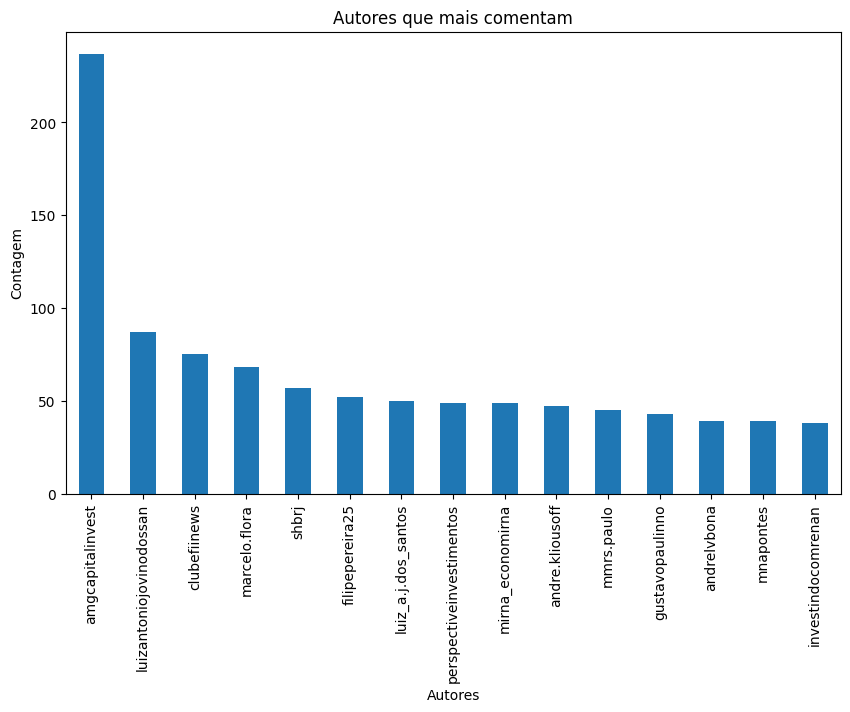

In [70]:
# Contagem de palavras
autor_counts = df['autor'].explode().value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
autor_counts.head(15).plot(kind='bar')
plt.xlabel('Autores')
plt.ylabel('Contagem')
plt.title('Autores que mais comentam')
plt.show()

### Os tipos de interações mais frequentes

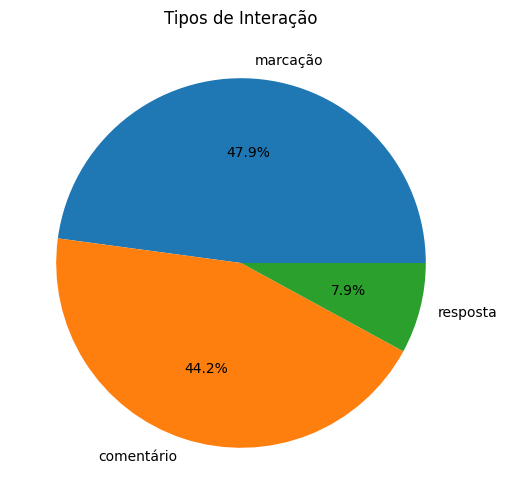

In [71]:
# Contar os tipos de interação
count_interactions = df['tipoInteracao'].value_counts()
# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
count_interactions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tipos de Interação')
plt.ylabel('')
plt.show()

### Tipos de sentimentos mais frequentes

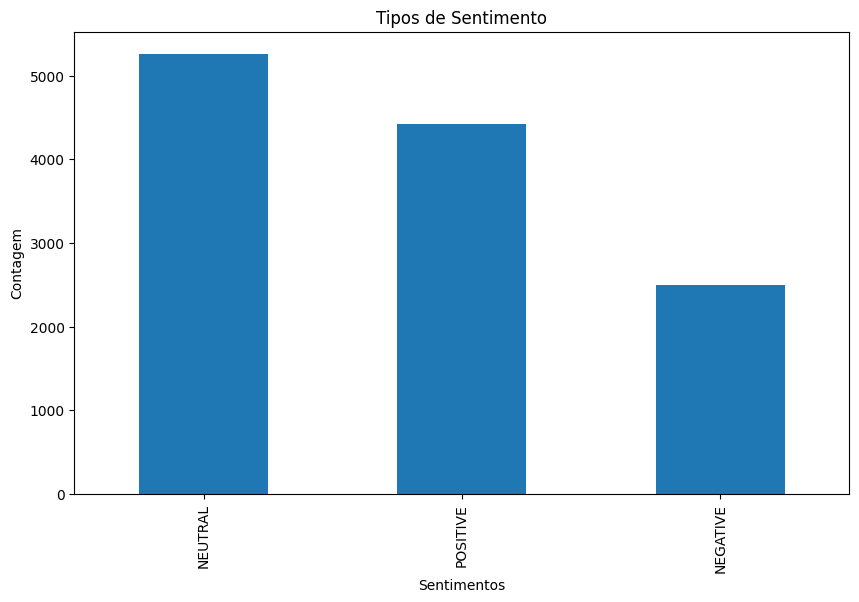

In [72]:
# Contar os tipos de sentimentos
count_sentimentos = df['sentimento'].value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
count_sentimentos.plot(kind='bar')
plt.xlabel('Sentimentos')
plt.ylabel('Contagem')
plt.title('Tipos de Sentimento')
plt.show()

### Frequência dos sentimentos por tipo de Interação

<Figure size 1000x600 with 0 Axes>

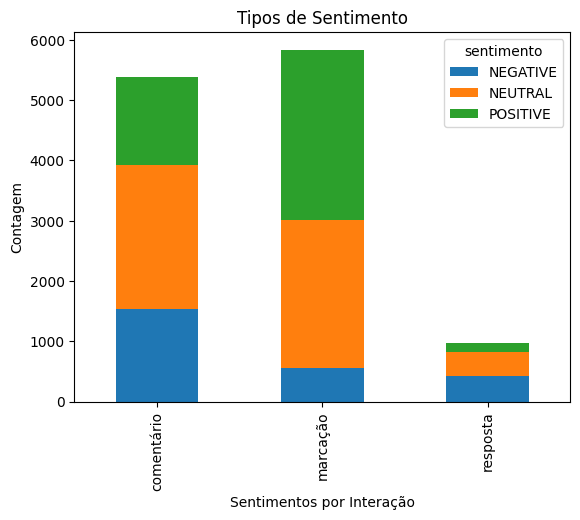

In [73]:
# Contar os tipos de sentimentos por Interação
contagem = df.groupby(['tipoInteracao', 'sentimento']).size().unstack(fill_value=0)

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
contagem.plot(kind='bar', stacked=True)
plt.xlabel('Sentimentos por Interação')
plt.ylabel('Contagem')
plt.title('Tipos de Sentimento')
plt.show()

# 3. Testes isolados



Nesta seção, começamos a fazer testes isolados para demonstrar como é o funcionamento de alguns dos pré-processos que iremos utilizar no dataframe principal. O objetivo é dar um exemplo para visualizar como iremos utilizar antes de ser aplicado em outras funções. Os pré-processos são:
- Tokenização
- Tratamento de emojis
- Tratamento de abreviações
- Remoção de Stopwords
- Remoção de Alfanuméricos
- Lematização

#### 3.1 Tokenização

Aqui estamos pegando a frase e separando ela em suas diversas palavras e componentes.

In [86]:
text = "@btgpacutal https://linkd.in/AQwasd Pessoal, vcs sabiam que esse é o melhor banco da América Latina?!😍 #teste123"

tk = TweetTokenizer()
words = tk.tokenize(text)  

words

['@btgpacutal',
 'https://linkd.in/AQwasd',
 'Pessoal',
 ',',
 'vcs',
 'sabiam',
 'que',
 'esse',
 'é',
 'o',
 'melhor',
 'banco',
 'da',
 'América',
 'Latina',
 '?',
 '!',
 '😍',
 '#teste123']

#### 3.2 Tratamento de emoji

Aqui fazemos o tratamento do emoji que foi visto na frase anterior.

Passamos de um valor "visual" para um valor "textual"

In [89]:
demojized = [emoji.demojize(word) if emoji.emoji_count(word) > 0 else word for word in words]
demojized = [word.replace(":", "").replace("_", "") if any(c in word for c in [":", "_"]) else word for word in demojized]
demojized = [word.replace("-", "_") if "-" in word else word for word in demojized]

demojized

['@btgpacutal',
 'https//linkd.in/AQwasd',
 'Pessoal',
 ',',
 'vcs',
 'sabiam',
 'que',
 'esse',
 'é',
 'o',
 'melhor',
 'banco',
 'da',
 'América',
 'Latina',
 '?',
 '!',
 'smilingfacewithheart_eyes',
 '#teste123']

#### 3.3 Remoção de Alfanuméricos

In [96]:
output_list = []
for word in demojized:
    if word.strip(): 
        palavra_sem_marcacao = re.sub((r'@\w*'), '', word)
        palavra_sem_hashtag = re.sub((r'#\w*'), '', palavra_sem_marcacao)
        palavra_sem_hyperlink = re.sub(r'https\S*', '', palavra_sem_hashtag)
        output_list.extend(re.findall(r'\w+', palavra_sem_hyperlink)) # analisar se não é melhor usar o append em vez de extend

output_list

['Pessoal',
 'vcs',
 'sabiam',
 'que',
 'esse',
 'é',
 'o',
 'melhor',
 'banco',
 'da',
 'América',
 'Latina',
 'smilingfacewithheart_eyes']

#### 3.3 Tratamento de abreviações

In [88]:
norm = Normaliser(tokenizer='readable')
palavras_normalizadas = []

for palavra in demojized:
  normalizacao = norm.normalise(palavra)
  palavras_normalizadas.append(normalizacao)

# Verificando se alguma palavra normalizada contém '_'
palavras_tratadas = []
for palavra in palavras_normalizadas:
    if '_' in palavra:
        tratado = palavra.replace(' ', '')
        palavras_tratadas.append(tratado)
    else:
        palavras_tratadas.append(palavra)

print(palavras_tratadas)

['@btgpacutal', 'tops / / link . in / abas', 'pessoal', ',', 'vocês', 'sabiam', 'que', 'esse', 'é', 'o', 'melhor', 'banco', 'da', 'américa', 'latina', '?', '!', 'smilingfacewithheart_eyes', '#teste123']


#### 3.4 Remoção de stopwords

Aqui nós iremos remover palavras que consideramos "desnecessárias" para a análise de sentimentos.

Iremos demonstrar uma lista de quais palavras podem ser essas.

In [77]:
stopwords = nltk.corpus.stopwords.words('portuguese')

stopwords[:10] # exemplo de até 10 palavras, mas podem ser usadas mais que isso

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [78]:
filtered_demojized = []

for palavra in palavras_tratadas:
    if palavra not in stopwords:
        filtered_demojized.append(palavra)

filtered_demojized

['@',
 'btgpacutal',
 'tops',
 '',
 '/ / link . in / abas',
 'pessoal',
 ',',
 'sabiam',
 'melhor',
 'banco',
 'américa',
 'latina',
 '?',
 '!',
 'smilingfacewithheart_eyes',
 '',
 'teste123']

#### 3.6 Lematização


O modelo pt_core_news_sm do SpaCy para o português, que estamos utilizando, utiliza uma estratégia de lematização baseada em regras e dicionário. No entanto, o modelo pode não conseguir lematizar corretamente algumas palavras, especialmente quando se trata de casos irregulares.

In [80]:
nlp = spacy.load("pt_core_news_sm")

lista = []

for palavra in output_list:
  doc = nlp(palavra)
  for token in doc:
    if token.lemma_ != '-PRON-':  # Ignorar pronomes pessoais
      if token.pos_ == 'VERB':  # Verificando se é um verbo
          lema = token.lemma_
          break
      else:
          lema = token.lemma_  # Usar o lema do token atual
  lista.append(lema)

print(lista)

['btgpacutal', 'top', 'linkr', 'in', 'aba', 'pessoal', 'sab', 'bom', 'Banco', 'américar', 'latino', 'smilingfacewithheart_eyes', 'Teste123']


# 4. Definição de funções


Aqui em definição de funções é onde iremos criar as funções referentes aos tratamentos que mostramos acima! Já que, dessa forma, poderemos chamar essas mesmas funções em qualquer momento para fazer o tratamento do conteúdo textual.
- Tokenização
- Tratamento de emojis
- Tratamento de abreviações
- Remoção de Stopwords
- Remoção de Alfanuméricos
- Lematização

#### 4.1 Tokenização

In [27]:
def tokenizer(comentarios):
  comentarios_tokenizados = []
  for comentario in comentarios:
    palavras = nltk.word_tokenize(comentario.lower())
    comentarios_tokenizados.append(palavras)
  return comentarios_tokenizados

#### 4.2 Tratamento de abreviações 


In [28]:
# Dicionário de gírias e abreviações para normalização
dicionario_girias = {
    'vc': 'você',
    'vcs':'você',
    'Vc': 'você',
    'pq': 'porque',
    'Pq': 'porque',
    'tbm': 'também',
    'q': 'que',
    'td': 'tudo',
    'blz': 'beleza',
    'flw': 'falou',
    'kd': 'cadê',
    'Gnt ': 'gente',
    'gnt ': 'gente',
    'to': 'estou',
    'mt': 'muito',
    'cmg': 'comigo',
    'ctz': 'certeza',
    'jah': 'já',
    'naum': 'não',
    'ta': 'está',
    'eh': 'é',
    'vdd': 'verdade',
    'vlw': 'valeu',
    'p': 'para',
    'sdds': 'saudades',
    'qnd': 'quando',
    'msm': 'mesmo',
    'fzr': 'fazer',
    'ss': 'sim',
    'Ss': 'sim',
    'pdc': 'pode crer',
    'nn': 'não',
    'Nn': 'não',
    'pls': 'please',
    'obg': 'obrigado',
    'agr': 'agora'
}

In [29]:
palavras_desconsideradas = {
    "warrenbrasil", "bicharaemotta", "sportainment", "sportainmet", "sportainmetâ", "sportainmentâ", "roundpushpin",
    "hubstage", "kaletsky", "scandiuzzi", "futofmoney", "ricktolledo", "thaotinhasbfc", "winthegame", "romulofialdini",
    "disclaimer", "astraoficialbr", "furnasenergia", "alelobrasil", "bancodaycoval", "grupohagana", "robertoljustus",
    "steinwaybrasil", "joseavillez", "dianaroth", "beachtennis", "alliancejjteam", "fabiogurgel", "blackrocks",
    "masterjacare", "gigipaivabjj", "clubefiinews", "mouratoglou", "octocapitalbr", "oficinadofraja" "blackintech"}

In [30]:
def comentarios_normalizados(tokens, dicionario_girias, palavras_desconsideradas):
  tokens_normalizados = []

  for sentence in tokens:
    treated = []

    for palavra in sentence:
        if palavra in palavras_desconsideradas:
            treated.append(palavra)
        else:
            if palavra in dicionario_girias:
                palavra_normalizada = dicionario_girias.get(palavra, palavra)
                treated.append(palavra_normalizada)
            else:
                treated.append(palavra)

    treated = [palavra.replace(' ', '') if '_' in palavra else palavra for palavra in treated]
    tokens_normalizados.append(treated)

  return tokens_normalizados

In [58]:
texto_teste = df['texto'][:2]
texto_teste

0    Confira os resultados dos nossos fundos no mês...
1    A Alvarez & Marsal estará conosco no Sportainm...
Name: texto, dtype: object

In [61]:
for sentence in texto_teste:
    for word in sentence:
        print(word)
        break

C
A


#### 4.3 Tratamento de emoji

In [31]:
def demojize_tokens(tokens):
  demojized_tokens = []
  for termo in tokens:
    demojized = [emoji.demojize(palavra) if emoji.emoji_count(palavra) > 0 else palavra for palavra in termo]
    demojized = [palavra.replace(":", "").replace("_", "") if any(c in palavra for c in [":", "_"]) else palavra for palavra in demojized]
    demojized = [palavra.replace("-", "_") if "-" in palavra else palavra for palavra in demojized]
    demojized_tokens.append(demojized)
  return demojized_tokens

#### 4.4 Remoção de stopwords

In [32]:
def remove_stopwords(tokens):
  stopwords = nltk.corpus.stopwords.words('portuguese')
  filtered_tokens = []
  for sentence in tokens:
      filtered = [palavra for palavra in sentence if palavra not in stopwords]
      filtered_tokens.append(filtered)
  return filtered_tokens

#### 4.5 Remoção de Alfanuméricos


In [49]:
def removendo_alfanumericos(tokens):
  output_tokens = []
  for sentence in tokens:
      output_list = []
      for palavra in sentence:
          if palavra.strip(): # Verifica se a palavra não é uma string vazia
                palavra_sem_marcacao = re.sub((r'@\w*'), '', palavra)
                palavra_sem_hyperlink = re.sub(r'http\s*|www.\s*', '', palavra_sem_marcacao)
                output_list.extend(re.findall(r'\w+', palavra_sem_hyperlink)) # analisar se não é melhor usar o append em vez de extend
      output_tokens.append(output_list)
  return output_tokens

#### 4.6 Lematização


In [34]:
def lematizacao(tokens):
  # Carregar o modelo pré-treinado do SpaCy para o idioma português
  nlp = spacy.load("pt_core_news_sm")
  lemmatized_tokens = []

  for sentence in tokens:
    lemma_list = []
    doc = nlp(" ".join(sentence))  # Unir as palavras da frase em uma única string

    for token in doc:
      if token.lemma_ != '-PRON-':
        if token.pos_ == 'VERB':
          palavra_lematizada = token.lemma_
        else:
          palavra_lematizada = token.lemma_

        if palavra_lematizada:
          lemma_list.append(palavra_lematizada)

    lemmatized_tokens.append(lemma_list)
    
  # Converter todas as palavras para minúsculas
  lemmatized_tokens_lower = []
  for sentence in lemmatized_tokens:
    sentence_lower = [palavra.lower() for palavra in sentence]
    lemmatized_tokens_lower.append(sentence_lower)
  
  return lemmatized_tokens_lower

#### 4.7 Processamento de texto

In [35]:
def processarTexto(normTexto):
  tokens_processados = normTexto.map(lematizacao)
  return tokens_processados

# 5. Testes das funções

#### Selecionando algumas frases para fazer testes

In [36]:
df

,autor,texto,sentimento,tipoInteracao
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


In [37]:
print(df['texto'].iloc[113])

Esse convite é para você que é mulher e que curte tecnologia 🤩  O BTG Pactual, maior banco de Investimentos da América Latina, está convidando você para participar do BTG Faz Tech.  ➡️ Será um encontro virtual feito por mulheres e para mulheres. Nele você terá a oportunidade de conhecer melhor o time de mulheres da área de tech do banco e aprender com cases de sucesso.   Para se inscrever basta preencher o formulário no link da nossa bio. Te esperamos lá 🚀  #tecnologia #mulheresnatecnologia #btgpactual #mercadofinanceiro #tech #btgfaztech #estagio


In [38]:
print(df['texto'].iloc[126])

Palmeiras vcs querem fazer uma liga de futebol com o @btgpactual sem o @botafogo? o forte futebol também parece que excluiu o botafogo? aí querem arrumar 1 bilhão? Kkkkkkkkk, o John Textor assim vai comprar, vamos subir o sarrafo srs, liga não é pra ninguém mandar em ninguém foi assim q começou a falência do futebol brasileiro, querer ser o dono, o flamengo tem muito essa mania, inclua o botafogo aí fazendo o favor, vai por mim. 🔥


#### 5.1 Tokenização
- Para o processo de tokenização, é possível visualizar que em qualquer caso, a função consegue tokenizar todo e qualquer termo existente da frase.

In [39]:
tokenized_data = tokenizer(df['texto'])
print(tokenized_data[126])

['palmeiras', 'vcs', 'querem', 'fazer', 'uma', 'liga', 'de', 'futebol', 'com', 'o', '@', 'btgpactual', 'sem', 'o', '@', 'botafogo', '?', 'o', 'forte', 'futebol', 'também', 'parece', 'que', 'excluiu', 'o', 'botafogo', '?', 'aí', 'querem', 'arrumar', '1', 'bilhão', '?', 'kkkkkkkkk', ',', 'o', 'john', 'textor', 'assim', 'vai', 'comprar', ',', 'vamos', 'subir', 'o', 'sarrafo', 'srs', ',', 'liga', 'não', 'é', 'pra', 'ninguém', 'mandar', 'em', 'ninguém', 'foi', 'assim', 'q', 'começou', 'a', 'falência', 'do', 'futebol', 'brasileiro', ',', 'querer', 'ser', 'o', 'dono', ',', 'o', 'flamengo', 'tem', 'muito', 'essa', 'mania', ',', 'inclua', 'o', 'botafogo', 'aí', 'fazendo', 'o', 'favor', ',', 'vai', 'por', 'mim', '.', '🔥']


In [51]:
print(tokenized_data[4])

['@', 'ricktolledo', 'sim']


In [52]:
print(tokenized_data[0])

['confira', 'os', 'resultados', 'dos', 'nossos', 'fundos', 'no', 'mês', 'de', 'fevereiro/22', '.', 'todas', 'as', 'informações', ',', 'documentações', 'e', 'materiais', 'técnicos', 'dos', 'fundos', 'podem', 'ser', 'acessados', 'pelos', 'links', 'abaixo', ':', '>', 'v8', 'cash', 'fi', 'renda', 'fixa', 'cp', ':', 'https', ':', '//lnkd.in/dusc2jmn', '>', 'v8', 'vanquish', 'termo', 'fi', 'renda', 'fixa', ':', 'https', ':', '//lnkd.in/d3pngjuu', '>', 'v8', 'veyron', 'smart', 'beta', 'fi', 'ações', ':', 'https', ':', '//lnkd.in/djnjw4pp', '>', 'v8', 'elva', 'deb', '.', 'incentivadas', 'fic', 'fim', 'cp', ':', 'https', ':', '//lnkd.in/dap-37vv', '>', 'v8', 'challenger', 'fim', 'cp', ':', 'https', ':', '//lnkd.in/d5bnhzqj', '>', 'v8', 'anf', 'luxbridge', 'global', 'real', 'estate', 'fim', 'ie', ':', 'https', ':', '//lnkd.in/dxzcatpp', 'onde', 'você', 'encontra', 'nossos', 'fundos', ':', 'modalmais', 'oramainvestimentos', 'warrenbrasil', 'terrainvestimentosoficial', 'ativainvestimentos', 'novaf

In [54]:
df['texto'][0]

'Confira os resultados dos nossos fundos no mês de fevereiro/22. Todas as informações, documentações e materiais técnicos dos fundos podem ser acessados pelos links abaixo:  > V8 Cash FI Renda Fixa CP: https://lnkd.in/dusC2Jmn > V8 Vanquish Termo FI Renda Fixa: https://lnkd.in/d3PnGJUu > V8 Veyron Smart Beta FI Ações: https://lnkd.in/dJnJW4PP > V8 Elva Deb. Incentivadas FIC FIM CP: https://lnkd.in/dap-37vV > V8 Challenger FIM CP: https://lnkd.in/d5bNHZQJ > V8 ANF Luxbridge Global Real Estate FIM IE: https://lnkd.in/dXZcaTpp  Onde você encontra nossos fundos: modalmais oramainvestimentos warrenbrasil terrainvestimentosoficial ativainvestimentos novafuturainvestimentos nubank nectoninvestimentos miraeassetcorretora toroinvestimentos rbinvestimentos guideinvestimentos btgpactual xpinvestimentos simpaulinvestimentos   #v8capital #investir #investimentos #mercadofinanceiro #ibovespa #cdi #rendafixa #multimercado #ações'

#### 5.2 Tratamento de abreviações 


In [40]:
normalizacao_data = comentarios_normalizados(tokenized_data, dicionario_girias, palavras_desconsideradas)
print(normalizacao_data[126])

['palmeiras', 'você', 'querem', 'fazer', 'uma', 'liga', 'de', 'futebol', 'com', 'o', '@', 'btgpactual', 'sem', 'o', '@', 'botafogo', '?', 'o', 'forte', 'futebol', 'também', 'parece', 'que', 'excluiu', 'o', 'botafogo', '?', 'aí', 'querem', 'arrumar', '1', 'bilhão', '?', 'kkkkkkkkk', ',', 'o', 'john', 'textor', 'assim', 'vai', 'comprar', ',', 'vamos', 'subir', 'o', 'sarrafo', 'srs', ',', 'liga', 'não', 'é', 'pra', 'ninguém', 'mandar', 'em', 'ninguém', 'foi', 'assim', 'que', 'começou', 'a', 'falência', 'do', 'futebol', 'brasileiro', ',', 'querer', 'ser', 'o', 'dono', ',', 'o', 'flamengo', 'tem', 'muito', 'essa', 'mania', ',', 'inclua', 'o', 'botafogo', 'aí', 'fazendo', 'o', 'favor', ',', 'vai', 'por', 'mim', '.', '🔥']


#### 5.3 Tratamento de emoji

In [41]:
demojized_data = demojize_tokens(normalizacao_data)
print(demojized_data[126])

['palmeiras', 'você', 'querem', 'fazer', 'uma', 'liga', 'de', 'futebol', 'com', 'o', '@', 'btgpactual', 'sem', 'o', '@', 'botafogo', '?', 'o', 'forte', 'futebol', 'também', 'parece', 'que', 'excluiu', 'o', 'botafogo', '?', 'aí', 'querem', 'arrumar', '1', 'bilhão', '?', 'kkkkkkkkk', ',', 'o', 'john', 'textor', 'assim', 'vai', 'comprar', ',', 'vamos', 'subir', 'o', 'sarrafo', 'srs', ',', 'liga', 'não', 'é', 'pra', 'ninguém', 'mandar', 'em', 'ninguém', 'foi', 'assim', 'que', 'começou', 'a', 'falência', 'do', 'futebol', 'brasileiro', ',', 'querer', 'ser', 'o', 'dono', ',', 'o', 'flamengo', 'tem', 'muito', 'essa', 'mania', ',', 'inclua', 'o', 'botafogo', 'aí', 'fazendo', 'o', 'favor', ',', 'vai', 'por', 'mim', '.', 'fire']


#### 5.4 Remoção de stopwords

In [42]:
stopwords_data = remove_stopwords(demojized_data)
print(stopwords_data[126])

['palmeiras', 'querem', 'fazer', 'liga', 'futebol', '@', 'btgpactual', '@', 'botafogo', '?', 'forte', 'futebol', 'parece', 'excluiu', 'botafogo', '?', 'aí', 'querem', 'arrumar', '1', 'bilhão', '?', 'kkkkkkkkk', ',', 'john', 'textor', 'assim', 'vai', 'comprar', ',', 'vamos', 'subir', 'sarrafo', 'srs', ',', 'liga', 'pra', 'ninguém', 'mandar', 'ninguém', 'assim', 'começou', 'falência', 'futebol', 'brasileiro', ',', 'querer', 'dono', ',', 'flamengo', 'mania', ',', 'inclua', 'botafogo', 'aí', 'fazendo', 'favor', ',', 'vai', 'mim', '.', 'fire']


#### 5.5 Remoção de alfanuméricos


In [50]:
alfanumericos_data = removendo_alfanumericos(stopwords_data)
print(alfanumericos_data[0])

['confira', 'resultados', 'fundos', 'mês', 'fevereiro', '22', 'todas', 'informações', 'documentações', 'materiais', 'técnicos', 'fundos', 'podem', 'acessados', 'links', 'abaixo', 'v8', 'cash', 'fi', 'renda', 'fixa', 'cp', 's', 'lnkd', 'in', 'dusc2jmn', 'v8', 'vanquish', 'termo', 'fi', 'renda', 'fixa', 's', 'lnkd', 'in', 'd3pngjuu', 'v8', 'veyron', 'smart', 'beta', 'fi', 'ações', 's', 'lnkd', 'in', 'djnjw4pp', 'v8', 'elva', 'deb', 'incentivadas', 'fic', 'fim', 'cp', 's', 'lnkd', 'in', 'dap_37vv', 'v8', 'challenger', 'fim', 'cp', 's', 'lnkd', 'in', 'd5bnhzqj', 'v8', 'anf', 'luxbridge', 'global', 'real', 'estate', 'fim', 'ie', 's', 'lnkd', 'in', 'dxzcatpp', 'onde', 'encontra', 'fundos', 'modalmais', 'oramainvestimentos', 'warrenbrasil', 'terrainvestimentosoficial', 'ativainvestimentos', 'novafuturainvestimentos', 'nubank', 'nectoninvestimentos', 'miraeassetcorretora', 'toroinvestimentos', 'rbinvestimentos', 'guideinvestimentos', 'btgpactual', 'xpinvestimentos', 'simpaulinvestimentos', 'v8

#### 5.6 Lematização


In [44]:
lematizacao_data = lematizacao(alfanumericos_data)
print(lematizacao_data[126])

['palmeira', 'querer', 'fazer', 'liga', 'futebol', 'btgpactual', 'botafogo', 'forte', 'futebol', 'parecer', 'excluir', 'botafogo', 'aí', 'querer', 'arrumar', '1', 'bilhão', 'kkkkkkkkk', 'john', 'textor', 'assim', 'ir', 'comprar', 'ir', 'subir', 'sarrafo', 'srs', 'liga', 'pra', 'ninguém', 'mandar', 'ninguém', 'assim', 'começar', 'falência', 'futebol', 'brasileiro', 'querer', 'dono', 'flamengo', 'mania', 'incluar', 'botafogo', 'aí', 'fazer', 'favor', 'ir', 'eu', 'fire']


#### 5.7 Processamento de texto

In [45]:
data_processada = processarTexto(lematizacao_data)
print(data_processada[126])

AttributeError: ignored

# 6. Processamento / Demonstrações

Nessa seção de processamento, nós aplicamos as funções criadas anteriormente e aplicamos elas no dataframe, como forma de demonstrar os resultados efetivos.
- tokenized = coluna tokenizada
- no_stopwords = coluna tokenizada e sem stopwords
- texto_processed = coluna tokenizada, sem stopwords e sem acentuações
- stemmed = coluna tokenizada, sem stopwords, sem acentuações e com o stemming aplicado

In [ ]:
df

In [ ]:
df['tokenized'] = df['texto'].apply(tokenizer)
df.head(10)

### Fatores que tem que corrigir

In [ ]:
df['sem_abreviacoes'] = df['tokenized'].apply(comentarios_normalizados) # tem que ver como passar como argumento o dicionário de abreviação e a lista de excluir palavras
df.head(10)

In [ ]:
df['emojis_tratados'] = df['sem_abreviacoes'].apply(demojize_tokens)
df.head(10)

In [ ]:
df['no_stopwords'] = df['emojis_tratados'].apply(remove_stopwords)
df.head(10)

In [ ]:
df['sem_alfanumerico'] = df['no_stopwords'].apply(removendo_alfanumericos)
df.head(10)

In [ ]:
df['lematizado'] = df['sem_alfanumerico'].apply(lematizacao)
df.head(10)

# 7. Pipeline simples de pré-processamento - **IMPORTANTE**/**TERMINAR**

Essa seção é extremamente importante, pois nela criamos a função de pipeline com todas as outras funções que criamos anteriormente. Então, ela é feita para que seja possível de rodar somente ela e ter um resultado efetivo!

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Módulo 6/projeto/base_nova_csv.csv')
data = data.rename(columns={'"anomalia"' : 'anomalia', '"dataPublicada"' : 'dataPublicada', '"autor"' : 'autor', '"texto"' : 'texto', '"sentimento"' : 'sentimento', '"tipoInteracao"' : 'tipoInteracao', '"probabilidadeAnomalia"' : 'probabilidadeAnomalia', '"linkPost"' : 'linkPost', '"processado"' : 'processado',  '"contemHyperlink"' : 'contemHyperlink' })
data_dropado = data.drop(['id', 'dataPublicada', 'anomalia', 'probabilidadeAnomalia', 'linkPost', 'processado', 'contemHyperlink'], axis=1)
df = data_dropado.loc[data_dropado['autor'] != 'btgpactual']

In [ ]:
df

## 7.1 Definição de Função

In [ ]:
def pipeline(comment):
      # Tokenização
      tokens = tokenizer(comment)
      # Normalização das abreviações
      normalizado = comentarios_normalizados(tokens, dicionario_girias, palavras_desconsideradas)
      # Tratamento de Emojis
      demojized = demojize_tokens(normalizado)
      # Remoção das stopwords
      no_stopwords = remove_stopwords(tokens)
      # Remoção dos alfanuméricos
      no_alfanumericos = removendo_alfanumericos(no_stopwords)
      # lematização
      tratados = lematizacao(no_alfanumericos)
      return tratados

In [ ]:
def join_tokens(tokens):
    joined_tokens = []
    for sublist in tokens:
        joined_tokens.append(' '.join(sublist))
    return [joined_tokens]

## 7.2 Testes da Função

- Criação da nova coluna, somente com a função pipeline, que repassa todo o nosso pré-processamento.

In [ ]:
# df['pós_tratamento'] = df['texto'].apply(pipeline)
# df.head(10)

In [ ]:
df = df['texto'].head(1000)
df

In [ ]:
df[1]

In [ ]:
pipeline(df)

In [ ]:
tratados = pipeline(df)
frases_tratadas = join_tokens(tratados)
frases_tratadas

# 8. Bag of Words (BoW)

O modelo Bag of Words (BoW) é uma técnica utilizada em processamento de linguagem natural para representar um texto como um conjunto de palavras desordenadas, ignorando a ordem e a estrutura gramatical das frases. 

Nesse modelo, cada palavra única do texto é transformada em uma "feature" (característica), e a frequência de cada palavra no texto é usada como um valor numérico para a feature correspondente.

Por exemplo, a frase "O gato preto pulou o muro" seria representada como um conjunto de palavras desordenadas: `'o', 'gato', 'preto', 'pulou', 'o', 'muro'`. A frequência de cada palavra seria contada, e o resultado seria um vetor numérico que representa a frequência de cada palavra na frase.


## 8.1 Teste isolado

In [ ]:
# Multiple documents
text = ["Estamos fazendo um projeto pro BTG!", "Somos alunos de Sistemas de Informação do Inteli", "O Renato é o nosso orientador", "O Hayashi é o nosso professor de programação"] 

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(sorted(vectorizer.vocabulary_))

# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print(vector.shape)
print(vector.toarray())

**AVISO**:
O modelo Bag of Words é uma técnica simples e eficiente para representar textos em formato vetorial, o que permite utilizá-los em algoritmos de aprendizado de máquina. 

No entanto, essa abordagem ignora informações importantes sobre a estrutura e o significado das frases, como a ordem das palavras e as relações sintáticas entre elas. Por isso, é comum utilizar técnicas mais avançadas, como a modelagem de tópicos (topic modeling) e as redes neurais, para lidar com textos mais complexos.

Porém, para vieses acadêmicos, estamos implementando e aprendendo como é o funcionamento desse processo.

## 8.2 Definição da Função


In [ ]:
df

In [ ]:
def bag_of_words(frases):
    # Inicializa o CountVectorizer
    vectorizer = CountVectorizer()

    # Concatena os tokens de cada frase em uma única string
    frases_concatenadas = [' '.join(tokens) for tokens in frases]

    # Cria o modelo Bag of Words
    bow_model = vectorizer.fit_transform(frases_concatenadas)

    # Dicionário de palavras
    dicionario = vectorizer.vocabulary_

    return bow_model, dicionario

# Definição da frase de entrada
palavras = tokens_processados

# Aplicar a função de Bag of Words
bow_model, dicionario = bag_of_words(palavras)

In [ ]:
# Criando a função de vetorização, a qual irá criar um DataFrame com todos os termos e suas contabilizações em cada comentário (representados pelo index)
def bow(comentarios): 
     # Inicializa o CountVectorizer
    vectorizer = CountVectorizer(analyzer=lambda x: x)
    # Cria o modelo Bag of Words
    bow_model = vectorizer.fit_transform(comentarios)
    # Cria um dataframe com as palavras e suas frequências
    bow_df = pd.DataFrame(bow_model.toarray(), columns=vectorizer.get_feature_names_out())
    return bow_df

---

## 8.2 Testes das funções


Como é possível visualizar, temos uma tabela com todos os termos que foram considerados chaves para a análise.

In [ ]:
df = bow(textos)
df

- Mostrando a primeira palavra, do primeiro comentário, e como ela se repete uma vez e duas vezes em cada um dos outros comentários

In [ ]:
df['conf'].value_counts()

In [ ]:
df[df['conf'] == 2]

In [ ]:
word_counts = df.sum()
top_words = word_counts.sort_values(ascending=False)
top_10 = top_words.head(10)

In [ ]:
top_10 

In [ ]:
palavras = list(top_words.index)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(palavras))
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 9. Plotagem de Gráficos

## Palavras mais frequentes

In [ ]:
# Contagem de palavras
word_counts = data_limpo['texto_tratado'].explode().value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
word_counts.head(20).plot(kind='bar')
plt.xlabel('Palavra')
plt.ylabel('Contagem')
plt.title('Top 20 Palavras Mais Frequentes')
plt.show()

# 10. Word2Vec